In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.display import clear_output
import os
from PIL import Image
import matplotlib.pyplot as plt
import json

In [7]:
base_folder = "/Users/mustafaomergul/Desktop/Cornell/Research/tangrams-compgen/tangrams-ref-dev-omer/refgame/public/games"
with open(os.path.join(base_folder, "idx_to_tangram.json"), 'r') as f:
    idx_to_tangram = json.load(f)

check_path = os.path.join('attention_checks', 'unannotated_complex_attention_checks.json')
with open(check_path, 'r') as f:
    all_checks = json.load(f)

In [8]:
IMAGE_DIR = '/Users/mustafaomergul/Desktop/Cornell/Research/tangrams-compgen/kilogram/square-black-imgs'

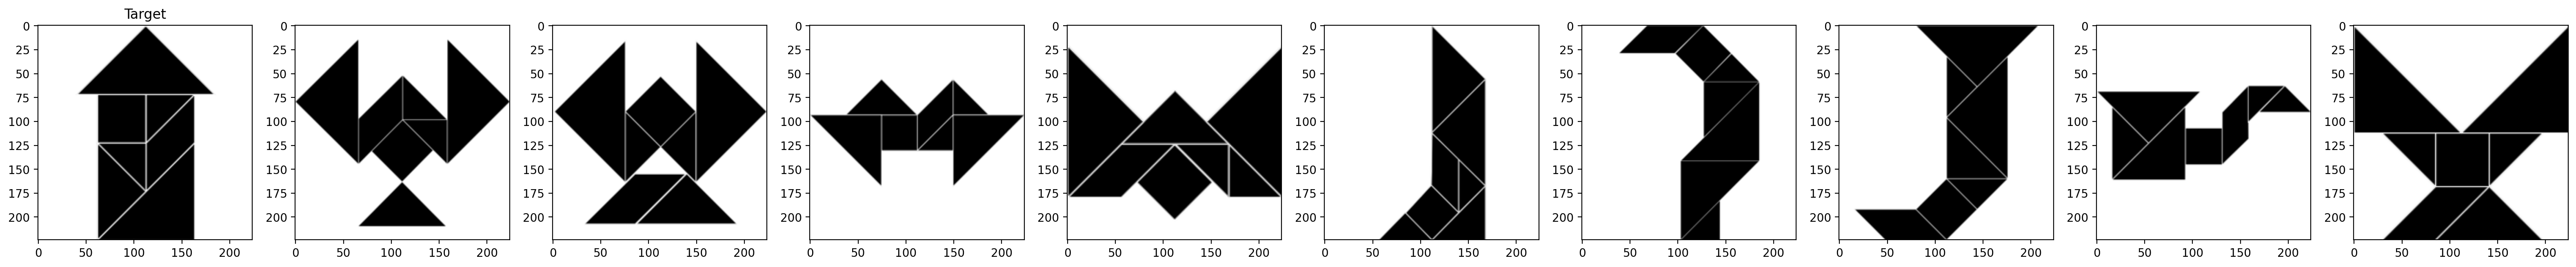

In [14]:
check_idx = 8
curr_block = all_checks[check_idx]

block_tangrams = [idx_to_tangram[str(t)] for t in curr_block["img"]]
targets = [idx_to_tangram[str(t)] for t in curr_block["tgt"]]

# Display everything
w = 10
h = 10
fig = plt.figure(figsize=(40, 40))
columns = 10
rows = 1

ax = []
for i in range(columns*rows):
    curr_tangram = block_tangrams[i][:-3] + "png"
    tangram_path = os.path.join(IMAGE_DIR, curr_tangram)
    img = Image.open(tangram_path).convert("RGB")
    ax.append(fig.add_subplot(rows, columns, i+1) )

    title = ""
    if block_tangrams[i] in targets:
        title += "Target"

    if title != "":
        ax[-1].set_title(title)  # set title

    plt.imshow(img)
    
plt.show() 

In [15]:
# Get all past annotations
anno_path = os.path.join("/Users/mustafaomergul/Desktop/Cornell/Research", 'kilogram', 'dataset', 'full.json')
with open(anno_path, 'r') as f:
    annos = json.load(f)

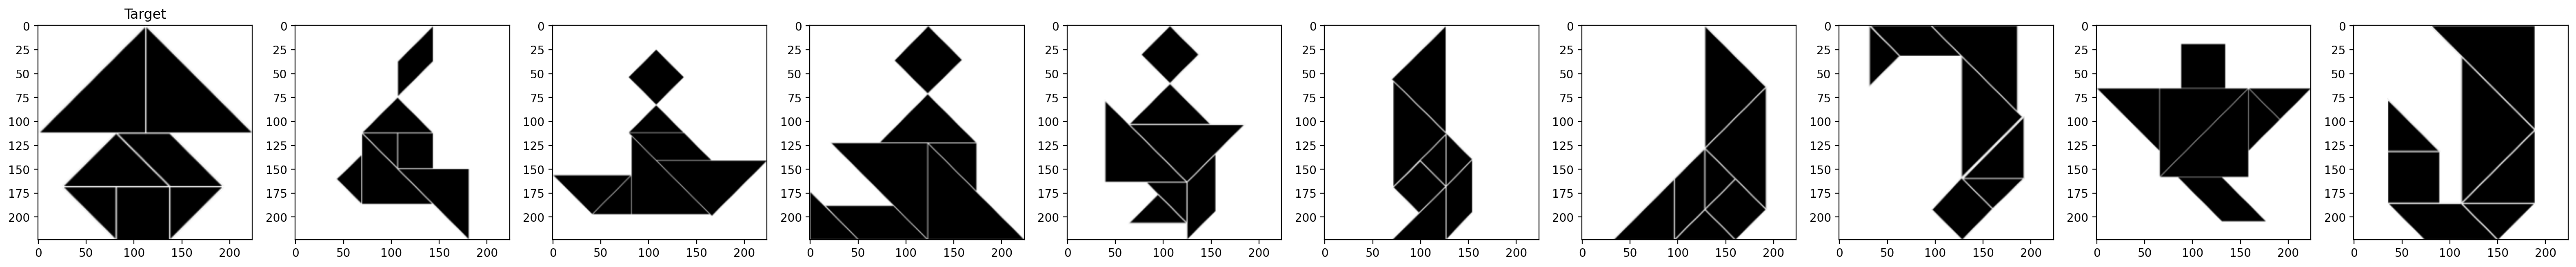

Example 99
lamp
human
lamp
lamp
table lamp
lamp
lamp
mushroom
woman in hat with hands folded
lamp
What is your annotation? The target is a table lamp


In [25]:
annotated_checks = []

for idx in range(100):
    clear_output(wait=True)
    curr_block = all_checks[idx]

    block_tangrams = [idx_to_tangram[str(t)] for t in curr_block["img"]]
    targets = [idx_to_tangram[str(t)] for t in curr_block["tgt"]]

    # Display everything
    w = 10
    h = 10
    fig = plt.figure(figsize=(40, 40))
    columns = 10
    rows = 1

    ax = []
    for i in range(columns*rows):
        curr_tangram = block_tangrams[i][:-3] + "png"
        tangram_path = os.path.join(IMAGE_DIR, curr_tangram)
        img = Image.open(tangram_path).convert("RGB")
        ax.append(fig.add_subplot(rows, columns, i+1) )

        title = ""
        if block_tangrams[i] in targets:
            title += "Target"

        if title != "":
            ax[-1].set_title(title)  # set title

        plt.imshow(img)
    
    plt.show() 
    
    print(f"Example {idx}")
    target = targets[0]
    for past_anno in annos[target[:-4]]['annotations']:
        print(past_anno['whole']['wholeAnnotation'])
        
    my_anno = input("What is your annotation? ")
    curr_block['anno'] = my_anno
    annotated_checks.append(curr_block)
    

In [27]:
annotated_checks[40]['anno'] = "A horse kicking"

In [28]:
annotated_checks[40]

{'img': [978, 401, 518, 658, 620, 241, 797, 378, 972, 478],
 'tgt': [978],
 'order': [[9, 1, 3, 2, 7, 6, 0, 5, 8, 4], [9, 3, 8, 4, 7, 2, 1, 6, 5, 0]],
 'roles': ['speaker', 'listener'],
 'anno': 'A horse kicking'}

In [29]:
# Save the attention checks
new_check_path = os.path.join('attention_checks', 'complex_attention_checks.pkl')
with open(new_check_path, 'wb') as f:
    pickle.dump(annotated_checks, f)

In [31]:
new_check_path = os.path.join('attention_checks', 'complex_attention_checks.pkl')
with open(new_check_path, 'rb') as f:
    print(len(pickle.load(f)))

100


In [4]:
# Load and iterate over attention checks again
import pickle
new_check_path = os.path.join('attention_checks', 'complex_attention_checks.pkl')
with open(new_check_path, 'rb') as f:
    annotated_checks = pickle.load(f)

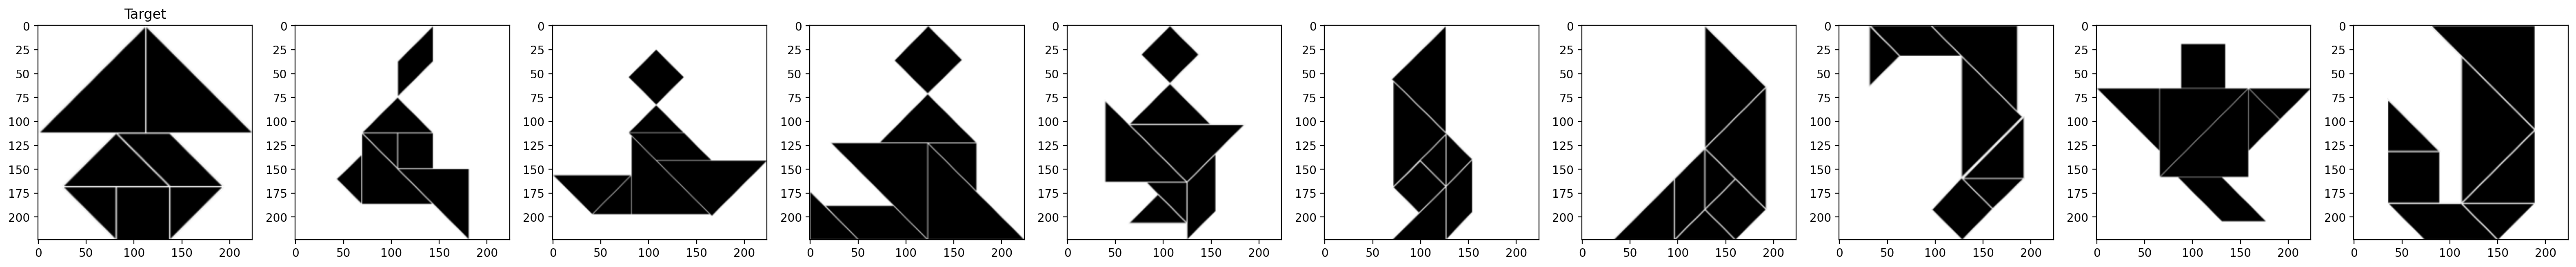

Example 99
Your past annotation: The target is a table lamp
Write a new annotation or leave blank: 


In [10]:
for idx in range(100):
    clear_output(wait=True)
    curr_block = annotated_checks[idx]

    block_tangrams = [idx_to_tangram[str(t)] for t in curr_block["img"]]
    targets = [idx_to_tangram[str(t)] for t in curr_block["tgt"]]

    # Display everything
    w = 10
    h = 10
    fig = plt.figure(figsize=(40, 40))
    columns = 10
    rows = 1

    ax = []
    for i in range(columns*rows):
        curr_tangram = block_tangrams[i][:-3] + "png"
        tangram_path = os.path.join(IMAGE_DIR, curr_tangram)
        img = Image.open(tangram_path).convert("RGB")
        ax.append(fig.add_subplot(rows, columns, i+1) )

        title = ""
        if block_tangrams[i] in targets:
            title += "Target"

        if title != "":
            ax[-1].set_title(title)  # set title

        plt.imshow(img)
    
    plt.show() 
    
    print(f"Example {idx}")
    print(f"Your past annotation: {curr_block['anno']}")
        
    my_anno = input("Write a new annotation or leave blank: ")
    if len(my_anno) != 0:
        curr_block['anno'] = my_anno

In [11]:
annotated_checks[80]

{'img': [851, 688, 10, 872, 1009, 350, 861, 264, 639, 719],
 'tgt': [851],
 'order': [[8, 3, 1, 9, 0, 5, 2, 6, 4, 7], [5, 6, 0, 8, 3, 2, 9, 4, 7, 1]],
 'roles': ['speaker', 'listener'],
 'anno': 'A person reading a book'}